In [20]:
import pandas as pd
import seaborn as sns

In [21]:
AE_results = pd.read_csv("AE_LSTM.csv")

AE_results["model"] = "AE-LSTM"
VAE_results = pd.read_csv("VAE_LSTM.csv")
VAE_results["model"] = "VAE-LSTM"
SAE_results = pd.read_csv("SAE_LSTM.csv")
SAE_results["model"] = "SAE-LSTM"

results = pd.concat([AE_results, VAE_results, SAE_results], ignore_index=True)
results

,dataset,roc_auc,pr_auc,test_set,model
0,MSL,0.538844,0.157314,semisupervised_test,AE-LSTM
1,SMD,0.615400,0.085721,semisupervised_test,AE-LSTM
2,OPPORTUNITY,0.240189,0.026628,semisupervised_test,AE-LSTM
3,CATSv2,0.538559,0.052353,semisupervised_test,AE-LSTM
4,MITDB,0.615543,0.078692,semisupervised_test,AE-LSTM
5,GHL,0.220621,0.012868,semisupervised_test,AE-LSTM
6,SVDB,0.710284,0.152467,semisupervised_test,AE-LSTM
7,SMAP,0.576347,0.090935,semisupervised_test,AE-LSTM
8,MSL,0.539695,0.157362,semisupervised_test,VAE-LSTM
9,SMD,0.554430,0.078507,semisupervised_test,VAE-LSTM


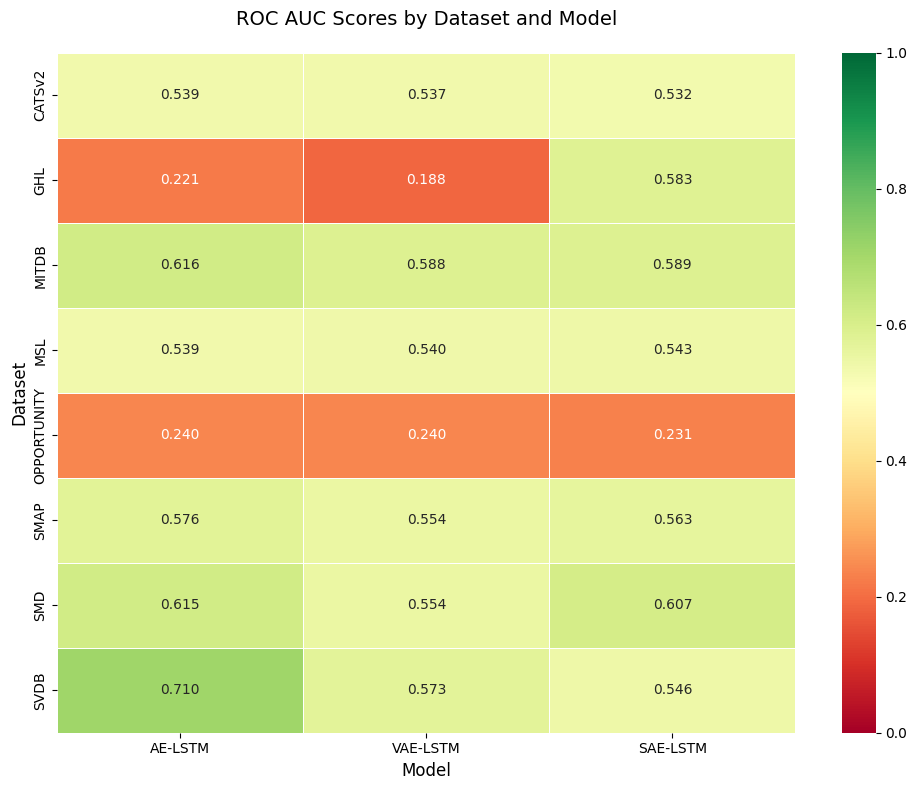

In [22]:
import matplotlib.pyplot as plt

# Pivot data for heatmap
results = results[results["test_set"] == "semisupervised_test"]
roc_results = results.pivot(index="dataset", columns="model", values="roc_auc")
column_order = ["AE-LSTM", "VAE-LSTM", "SAE-LSTM"]
roc_results = roc_results[column_order]

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    roc_results,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    center=0.5,
    vmin=0,
    vmax=1,
    linewidths=0.5,
)
plt.title("ROC AUC Scores by Dataset and Model", fontsize=14, pad=20)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Dataset", fontsize=12)
plt.tight_layout()
plt.show()

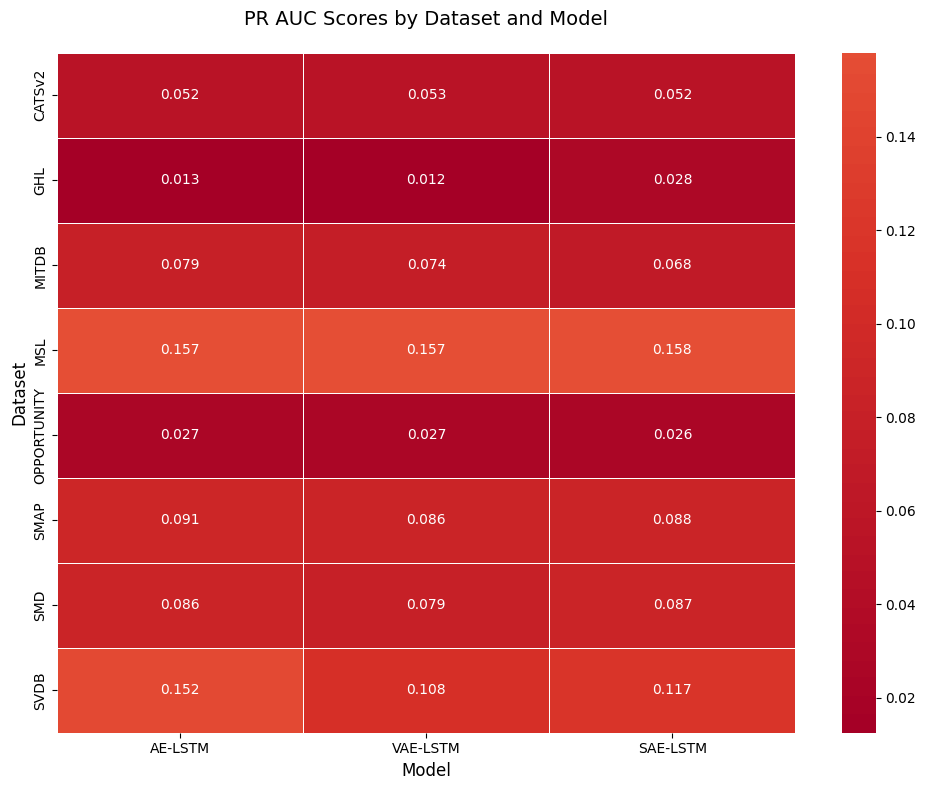

In [23]:
import matplotlib.pyplot as plt

# Pivot data for heatmap
pr_results = results.pivot(index="dataset", columns="model", values="pr_auc")
column_order = ["AE-LSTM", "VAE-LSTM", "SAE-LSTM"]
pr_results = pr_results[column_order]

# Create heatmap
plt.figure(figsize=(10, 8))
vmin_value = pr_results.min().min()
vmax_value = pr_results.max().max()
sns.heatmap(
    pr_results,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    center=0.5,
    vmin=vmin_value,
    vmax=vmax_value,
    linewidths=0.5,
)
plt.title("PR AUC Scores by Dataset and Model", fontsize=14, pad=20)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Dataset", fontsize=12)
plt.tight_layout()
plt.show()

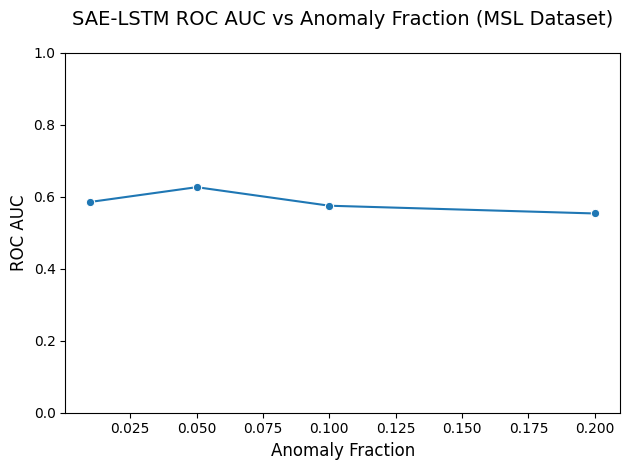

In [24]:
SAE_results_per_fraction = pd.read_csv("SAE_LSTM_anomaly_fraction_MSL.csv")

plot = sns.lineplot(
    data=SAE_results_per_fraction,
    x="anomaly_fraction",
    y="roc_auc",
    marker="o",
)
plot.set_title(
    "SAE-LSTM ROC AUC vs Anomaly Fraction (MSL Dataset)", fontsize=14, pad=20
)
plot.set_xlabel("Anomaly Fraction", fontsize=12)
plot.set_ylabel("ROC AUC", fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()